### Problem statement

A food delivery service is facing challenges in achieving profitability across its operations. With a dataset of 
1000 food orders, the service seeks to understand the dynamics of its cost structure and profitability to identify strategic opportunities for .reducing costs and improving profitability.

The objective of this task is the following:

- Detailed Cost Analysis: Identifying the major cost components associated with delivering food orders, including direct costs like delivery fees and indirect costs like discounts and payment processing fees.
- Profitability Evaluation: Calculating the profitability of individual orders and aggregating this data to assess overall profitability. This involves examining how revenue generated from commission fees measures against the total costs.
- Strategic Recommendations for Improvement: Based on the cost and profitability analysis, identifying actionable strategies to reduce costs, adjust pricing, commission fees, and discount strategies to improve profitability. This includes finding a “sweet spot” for commission and discount percentages that ensures profitability across orders.
- Impact Simulation of Proposed Strategies: Simulating the financial impact of the recommended strategies on profitability, using the dataset to forecast how adjustments in commission rates and discount strategies could potentially transform current losses into profits.

### Solution: How can we go about solving this?

- Do costs and profitability analysis of all orders
- Identify orders that are profitable and look at thier average commision and discount percentages
- Use this as a guidance to determine the optimal commission fee and discount percentages to be used on all orders
- Simulate this by showing how the suggested average commission fee and discount percentages will potentially lift overall profitability

In [27]:
# for analysis and data processing
import pandas as pd
import numpy as np
import seaborn as sns
import ppscore as pps
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
def read_data(path_to_csv_file):
    '''
    Reads csv files from specified paths

    Parameters:
            path to csv file locations
    Returns:
            dataframes of imported csv files
    '''
    # Read CSV files
    df = pd.read_csv(path_to_csv_file)
    
    return df

orders_data = read_data('food_orders_new_delhi.csv')

In [3]:
def df_snapshot(df):
    '''
    Returns top 5 rows of the dataframe.

    Parameters:
        df (DataFrame): Pandas dataframe
    '''
    return display(df.head())

print(f'orders_data:')
df_snapshot(orders_data)

orders_data:


,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [4]:
def data_types(df):
    '''
    Returns datatype of fields in a dataframe.

    Parameters:
        df (DataFrame): Pandas dataframe
    '''
    return df.info()

print(f'orders_data:')
data_types(orders_data)

orders_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [5]:
def null_checker(df):
    '''
    Returns the count of rows found in the data frame where there is a null present.

    Parameters:
        df (Dataframe): Pandas dataframe

    Returns:
        Prints the null count, null percentage, and row count per column.
    '''
    row_count = len(df)
    null_counts = df.isnull().sum().sort_values(ascending=False)
    null_percentages = (null_counts / row_count) * 100
    combined = pd.concat([null_counts, null_percentages], axis=1, keys=['Null Count', 'Null Percentage'])
    combined['Row Count'] = row_count
    print(combined)

# check nulls in train
print(f'orders_data:')
null_checker(orders_data)

orders_data:
                        Null Count  Null Percentage  Row Count
Order ID                         0              0.0       1000
Customer ID                      0              0.0       1000
Restaurant ID                    0              0.0       1000
Order Date and Time              0              0.0       1000
Delivery Date and Time           0              0.0       1000
Order Value                      0              0.0       1000
Delivery Fee                     0              0.0       1000
Payment Method                   0              0.0       1000
Discounts and Offers             0              0.0       1000
Commission Fee                   0              0.0       1000
Payment Processing Fee           0              0.0       1000
Refunds/Chargebacks              0              0.0       1000


### Data Cleaning and Processing

The dataset contains 1000 entries/orders and 12 columns, with no missing values in any of the columns. Now, we need to perform some data cleaning and preparation. Below are the necessary cleaning steps we need to take:

- Convert “Order Date and Time” and “Delivery Date and Time” to a datetime format, currently they're object data type.
- Convert “Discounts and Offers” to a consistent numeric value (if applicable) or calculate the discount amounts.
- Ensure all monetary values are in a suitable format for calculations

In [8]:
def convert_field_to_datetime(df,column):
    """
    Returns a dataframe with converted field from object to datetime
    
    Parameters:
        df (DataFrame): Pandas dataframe
        column (Object): Object field to datetime
    
    """
    df[column] = pd.to_datetime(df[column])
    
    return df

convert_field_to_datetime(orders_data,'Order Date and Time')
convert_field_to_datetime(orders_data,'Delivery Date and Time')

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,None,110,42,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,None,64,31,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0


In [13]:

def extract_discount(discount_str):
    """
    Function to extract numeric values from the 'Discounts and Offers' string
    
    """
    if 'off' in discount_str:
        # Fixed amount off
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        # Percentage off
        return float(discount_str.split('%')[0])
    else:
        # No discount
        return 0.0
    

# apply the function to create a new 'Discount Value' column
orders_data['Discount Percentage'] = orders_data['Discounts and Offers'].apply(lambda x: extract_discount(x))
# for percentage discounts, calculate the discount amount based on the order value
orders_data['Discount Amount'] = orders_data.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                   if x['Discount Percentage'] > 1
                                                   else x['Discount Percentage'], axis=1)

# adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column
orders_data['Discount Amount'] = orders_data.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                                   else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)

print(orders_data[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head())

   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                 None                  0.0             0.00
4         1992         50 off Promo                 50.0           996.00


### Cost and Profitability Analysis

For the cost analysis, we’ll consider the following costs associated with each order:

- Delivery Fee: The fee charged for delivering the order.
- Payment Processing Fee: The fee for processing the payment.
- Discount Amount: The discount provided on the order.
- We’ll calculate the total cost for the platform per order and then aggregate this data to understand the overall cost structure.

The revenue for the platform is mainly derived from the Commission Fee. We’ll calculate the net profit by subtracting the total costs (including discounts) from the revenue generated through commission fees.

In [17]:
# calculate total costs and revenue per order
orders_data['Total Costs'] = orders_data['Delivery Fee'] + orders_data['Payment Processing Fee'] + orders_data['Discount Amount']
orders_data['Revenue'] = orders_data['Commission Fee']
orders_data['Profit'] = orders_data['Revenue'] - orders_data['Total Costs']

# aggregate data to get overall metrics
total_orders = orders_data.shape[0]
total_revenue = orders_data['Revenue'].sum()
total_costs = orders_data['Total Costs'].sum()
total_profit = orders_data['Profit'].sum()

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}

print(overall_metrics)
print(orders_data[['Order ID','Revenue','Total Costs','Profit']].head())

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 232709.85, 'Total Profit': -105719.85}
   Order ID  Revenue  Total Costs  Profit
0         1      150       142.70    7.30
1         2      198       161.60   36.40
2         3      195       215.55  -20.55
3         4      146        77.00   69.00
4         5      130      1076.00 -946.00


Based on the analysis, here are the overall metrics for the food delivery operations:

- Total Orders: 1,000
- Total Revenue (from Commission Fees): 126,990 INR (Indian Rupee)
- Total Costs: 232,709.85 INR (including delivery fees, payment processing fees and discounts)
- Total Profit: -105,719.85 INR

The analysis indicates that the total costs associated with the food delivery operations exceed the total revenue generated from commission fees, resulting in a net loss. It suggests that the current commission rates, delivery fees, and discount strategies might not be sustainable for profitability.

Next step:
To better understand the distribution of costs, revenue, and profit, let’s plot:

- A histogram of profits per order to visualize the distribution of profitable and unprofitable orders.
- A pie chart to visualize the proportion of total costs (delivery fees, payment processing fees, and discounts).
- A bar chart to compare total revenue, total costs, and total profit

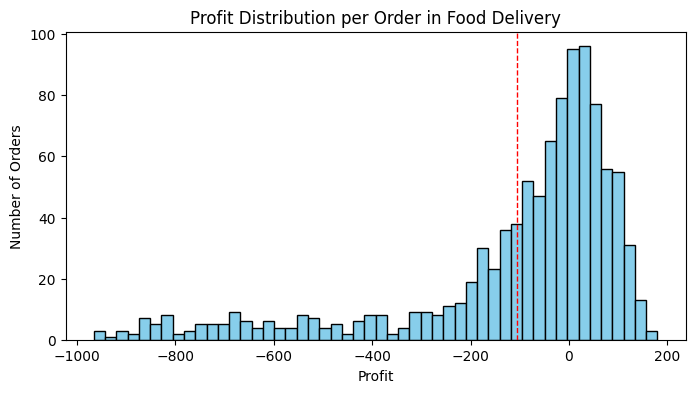

In [19]:
# Profits per order
plt.figure(figsize=(8, 4))
plt.hist(orders_data['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(orders_data['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

- The histogram shows a wide distribution of profit per order, with a noticeable number of orders resulting in a loss (below 0).
- The red dashed line indicates the average profit, which is in the negative territory, highlighting the overall loss-making situation.

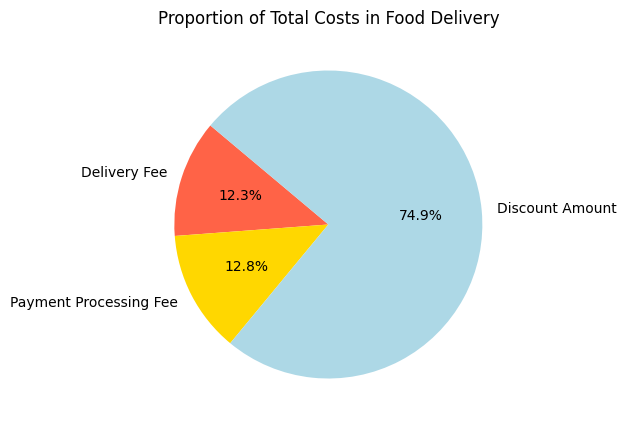

In [22]:
# Proportion of total costs
costs_breakdown = orders_data[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(5, 5))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

- The pie chart illustrates the breakdown of total costs into delivery fees, payment processing fees, and discount amounts. 
- Discounts constitute a significant portion of the costs, suggesting that promotional strategies might be heavily impacting overall profitability.

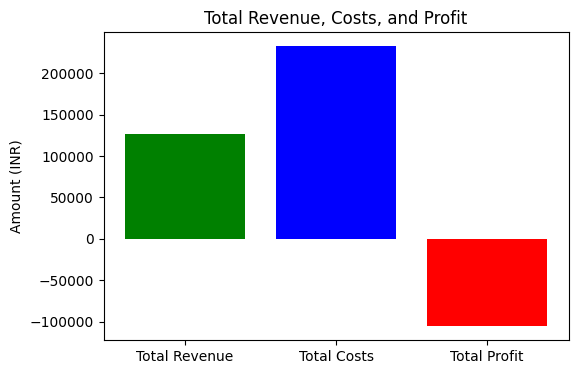

In [25]:
# Total revenue vs costs vs profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(6, 4))
plt.bar(totals, values, color=['green', 'blue', 'red'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

- The bar chart compares total revenue, total costs, and total profit. 
- It visually represents the gap between revenue and costs, clearly showing that the costs surpass the revenue, leading to a total loss.

### New Strategy for Profits

From the analysis so far we understood that the discounts on food orders are resulting in huge losses. Now, we need to find a new strategy for profitability. We need to find a sweet spot for offering discounts and charging commissions. 
To find a sweet spot for commission and discount percentages, we can analyze the characteristics of profitable orders more deeply. Specifically, we need to look for:

- A new average commission percentage based on profitable orders.
- A new average discount percentage for profitable orders, that could serve as a guideline for what level of discount still allows for profitability.

Given these new averages, we can suggest adjustments that might not only make individual orders profitable but also apply broadly across all orders to improve overall profitability.

In [39]:
# filter the dataset for profitable orders
profitable_orders = orders_data[orders_data['Profit'] > 0]

# calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

# calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# calculate the new and current averages
current_commission_percentage = ((orders_data['Commission Fee']/orders_data['Order Value'])*100).mean()
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
current_discount_percentage = ((orders_data['Discount Amount'] / orders_data['Order Value'])*100).mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(f'Current Commission (All orders) %: {current_commission_percentage}')
print(f'New Commission %: {new_avg_commission_percentage}') 
print(f'Current Discount (All orders) %: {current_discount_percentage}')
print(f'New Discount %: {new_avg_discount_percentage}')


Current Commission (All orders) %: 19.750890168545332
New Commission %: 30.508436145149435
Current Discount (All orders) %: 16.265
New Discount %: 5.867469879518072


- The average commission percentage for profitable orders (30.5%) is significantly higher than the overall average across all orders (19.7%). It suggests that a higher commission rate on orders might be a key factor in achieving profitability. 
- The average discount percentage for profitable orders (5.8%) is notably lower than the overall average (16.2%), indicating that lower discounts might contribute to profitability without significantly deterring order volume.

Based on this analysis, a strategy that aims for a commission rate closer to 30% and a discount rate around 6% could potentially improve profitability across the board.

Now, let’s visualize a comparison of profitability using actual versus recommended discounts and commissions across all orders. For this, we need to:

- Calculate the profitability per order using the actual discounts and commissions already present in the dataset.
- Simulate profitability per order using the recommended discounts (6%) and commissions (30%) to see the potential impact on profitability.

This comparison will help illustrate the potential impact of adopting the recommended discount and commission rates on the overall profitability of orders.

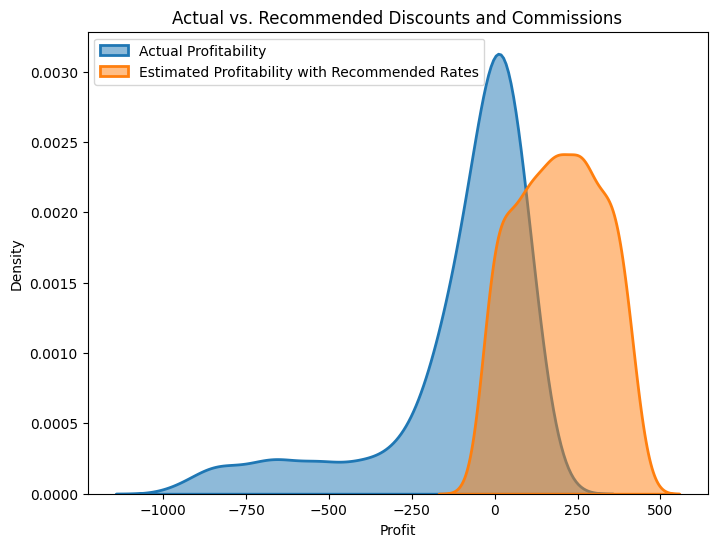

In [42]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 30.0  # 30%
recommended_discount_percentage = 6.0    # 6%

# calculate the simulated commission fee and discount amount using recommended percentages
orders_data['Simulated Commission Fee'] = orders_data['Order Value'] * (recommended_commission_percentage / 100)
orders_data['Simulated Discount Amount'] = orders_data['Order Value'] * (recommended_discount_percentage / 100)

# recalculate total costs and profit with simulated values
orders_data['Simulated Total Costs'] = (orders_data['Delivery Fee'] +
                                        orders_data['Payment Processing Fee'] +
                                        orders_data['Simulated Discount Amount'])

orders_data['Simulated Profit'] = (orders_data['Simulated Commission Fee'] -
                                   orders_data['Simulated Total Costs'])

plt.figure(figsize=(8, 6))

# actual profitability
sns.kdeplot(orders_data['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(orders_data['Simulated Profit'], label='Estimated Profitability with Recommended Rates', 
                                                                   fill=True, alpha=0.5, linewidth=2)
plt.title('Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

#### Insights

The actual profitability distribution shows a mix, with a significant portion of orders resulting in losses (profit < 0) and a broad spread of profit levels for orders. The simulated scenario suggests a shift towards higher profitability per order. The distribution is more skewed towards positive profit, indicating that the recommended adjustments could lead to a higher proportion of profitable orders.